In [654]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Linear Regression

Method of Linear Regression is based on minimization of square root error: <br/> <h3 align="center">$\underset{w}{min}\sum\limits_{n=1}^N[y_{n}-(w^{T}x_{n})]^2$</h3><br/>
We have used the following algorithm:<br/>
1: Constructing the matrix $X$ (input data matrix) and vector $y$ (target vector) from the data set, including $x_{0}=1$ (the column of 1s) <br/>
2: Compute the pseudo-inverse $X^{t}=(X^{T}X)^{-1}X^{T}$ of the matrix $X$<br/>
3: Return $w_{lin}=X^{t}y$ <br/>

For 1st task we implemented four functions: generating random data set, finding error of the model, pocket algorithm, and linesr regression.

In [655]:
# generation random data set with giving size
def generate_data(size):
    w_true = random.randint(1,10,size=2) #coefficients of Xs 
    b_true = random.randint(1,10) #bias term
    
    d = 2
    X = random.uniform(-1,1,(size,d))*10 

    Y = zeros(20)
    
#calculating final hypothesis
#here the parameters of target function can be extracted: 
#slope=-w_true[0]/w_true[1], bias=-b_true/w_true[1]

    h = X.dot(w_true) + b_true
    labels = (h > 0)*1

    # randomly choose 10
    indexes = random.randint(size, size=10)
    # flip chosen Ys
    for i in indexes:
        if (labels[i] == 1):
            labels[i] = 0
        else:
            labels[i] = 1
    Y = labels
    
    a=ones(size)    #to get bias coordinate x_0=1
    a1=a.reshape(size,1)
    X1=hstack((a1,X)) #input data matrix
    
    return X1, Y, w_true, b_true

In [656]:
def find_error(x, w, y):
    E = 0.0
    for i in range(len(x)):
        ypred = dot(x[i],w)
        if(ypred > 0 and y[i] == -1): #predicted wrongly as 1st class
            E += 1
        elif(ypred <= 0 and y[i] == 1): #predicted wrongly as 2nd class
            E += 1
    return E/x.size #find Error term by finding mean value

In [657]:
# oursize is the number of obsevations((x1, x2)), ntimes is the number of iterations of pocket algorithm
#w is the initial weights

def pocket(x, y, w, ntimes): 
    
    t = [] #array of number of updates
    tt = 0 #current update number
    #w= zeros(3)
    w_new=[]
    E=[]
    E_val=0.0
    
    for ii in range (ntimes):
        
        y_wr_collection = [] #saves indeces of the wrong predicted y
        ypredict=[]
        
        for i in range(len(x)):
            
            if dot(x[i],w)>0:
                ypredict.append(1)
            else: ypredict.append(0)
            
            if ypredict[i] != y[i]:
                y_wr_collection.append(i)
                
        #randomly choose the index of wrong classified x
        pick_random = np.random.randint(len(y_wr_collection)) 
        
        #new weight
        w_new = w + (y[pick_random]-ypredict[pick_random]) * x[pick_random]

        E_old = find_error(x, w, y)
        E_new = find_error(x, w_new, y)

        if (E_new < E_old): #compare old and new Error

            E.append(E_new) 
            t.append(tt)
            tt += 1
            w = copy(w_new) #update weight to new weight
            E_val=E_new
        

    return w

In [658]:
def lin_reg(x, y): 
    
    #to reshape in order to be able to compute dot product
    y_new=y.reshape(len(y),1)
    
    INV = np.linalg.inv(dot(x.T,x)) #inverse
    pseudo_inv_x=dot(INV, x.T)
    w=dot(pseudo_inv_x,y_new)
    
    E=find_error(x, w, y)
    w1=w.reshape(3)
    
    return w1


1. Generating a training data set of size 100:

In [659]:
x_train,y_train,w_true_train, b_true_train=generate_data(100)

2. Generating a test data set of size 1000 of the identical nature of 100.

In [660]:
x_test,y_test,w_true_test, b_true_test=generate_data(1000)

3. Run of Pocket algorithm:

In [661]:
w=zeros(3) #set initial weight vector of 0s
w_pocket=pocket(x_train,y_train,w,1000)
print ('Weights are: ',w_pocket)

Weights are:  [1.         6.25654088 9.54800547]


4. Run of Linear Regression algorithm:

In [662]:
w_lin=lin_reg(x_train, y_train)
print ('Weights are: ',w_lin)

Weights are:  [0.50043975 0.02643927 0.05720648]


In [663]:
slope_true=-w_true_train[0]/w_true_train[1]
bias_true=-b_true_train/w_true_train[1]
print('Slope of target function is ',slope_true, 'bias term is ',bias_true)

Slope of target function is  -0.6666666666666666 bias term is  -0.6666666666666666


In [664]:
bias_pocket = -w_pocket[1]/w_pocket[2]
slope_pocket = -w_pocket[0]/w_pocket[2]
print ('Final hypothesis of Pocket algorithm is ', 'g=',slope_pocket,'x','+',bias_pocket)

Final hypothesis of Pocket algorithm is  g= -0.10473391564760592 x + -0.6552720252839112


In [665]:
a_lin = -w_lin[1]/w_lin[2]
b_lin = -w_lin[0]/w_lin[2]
print (a_lin,b_lin)

-0.46217259843543046 -8.74795647669258


Here can be clearly seen that the slope values of both Pocket and Linear Reagression algorithms are very close to the slope of target function. However, the bias terms are different for both. It means that the lines approximated by two different algorithms have nearly equal slope but the location with respect to the origin are different.

5. Claculating $E_{test}(w_{pocket})$ and $E_{test}(w_{lin})$ of the test set:

In [666]:
E_pocket=find_error(x_test, w_pocket, y_test)
E_pocket

0.009333333333333334

In [667]:
E_lin=find_error(x_test, w_lin, y_test)
E_pocket

0.009333333333333334

6. Repeat the experiment 100 times with new data set:

In [668]:
x_new,y_new,w_true_new, b_true_new=generate_data(1000)

In [669]:
E_pocket_new=zeros(100)
E_lin_new=zeros(100)
w_new=zeros(3)
n=zeros(100)

for i in range (100):
    
    E_pocket_new[i]=find_error(x_new, w_pocket, y_new)
    E_lin_new[i]=find_error(x_new, w_lin, y_test)
    
    n[i]=i


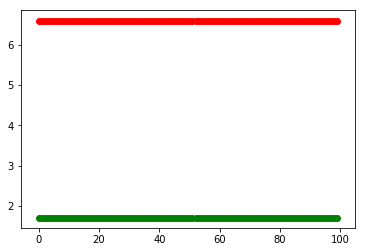

In [670]:
scatter(n,E_pocket_new*100, c='red')
scatter(n,E_lin_new*100, c="green")


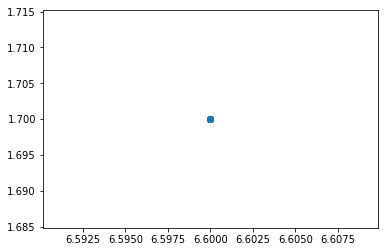

In [671]:
scatter(E_pocket_new*100,E_lin_new*100)

It can be clearly seen that after repeating experiment 100 times, the algorithm of Linear Regression is more efficient than Pocket. However, both algorithms gives very low error terms (less than 5%). 

**Pocket Algorithm**<br/>
*Results:* <br/>
1. It was seen that Pocket Algorithm generates very close parameters (slope and bias) to the target function. 
2. The Error terms were relatively low, no more than 10%. 
3. Error term obtained from test set (n=1000) by implemeting weights from training set is identical to the Error term of Linear Regression. <br/>


*Problems: <br/>*
1. The data is not completely separable, that is why it is impossible to get E_pocket = 0
2. Pocket algorithm is more time consuming than Linear Regression. 

**Linear Regression**<br/>
*Results:*<br/>
1. Efficiently fast and easy calculate weights with low Error terms.
2. Get very close parameters to the target function. However, the bias is much more different. It means that the obtained line is located in a different place than target function. Line of Pocket algorithm is closer.

*Problems:*<br/>
1. Calculating pseudo-inverse require matrix being invertible which might not be true for some data sets. Thus, various other function might be implemented, but to find common function which will work for all cases is very hard. 
2. Linear Regression is limited to linear relationship. We first assume that classification might be done by estimating a line. 


# 2. Gradient Descent for Logistic Regression 

In [683]:
from sklearn.datasets import load_iris
iris = load_iris()

In [684]:
import random

def train_test_split(data):
    X = iris.data
    y = iris.target
    
    # random sampling
    train_size = int(0.8*X.shape[0]) #spliting into D_train=80%
    train_ind = random.sample(range(0,150),120) # unique random indices
    X_train = X[train_ind]
    y_train = y[train_ind]
    
    #spliting into D_test=80%
    test_ind = list(set(range(0,150))-set(train_ind)) 
    X_test = X[test_ind]
    y_test = y[test_ind]

    return X_train, y_train, X_test, y_test

In [685]:
X_train, y_train, X_test, y_test = train_test_split(iris)

In [686]:
train_samples, d = X_train.shape
test_samples = X_test.shape[0]

train_ind = random.sample(range(0,120),120)
test_ind = random.sample(range(0,30),30)

epochs = 100
learning_rate = 0.0001

weights = np.zeros(d+1)

E_in = []
E_out = []

#experiment
for epoch in range(epochs):
    E_in_total = 0
    for ind in train_ind:
        extended_X_train = np.append(X_train[ind],1)
        cross_entropy_error = np.log(1+np.exp(-y_train[ind]*2*np.dot(weights.T, extended_X_train)))
        weights = weights + learning_rate * cross_entropy_error # does not work with minus sign!
        
        E_in_total += cross_entropy_error
    E_in_average = E_in_total / train_samples
    E_in.append(E_in_average)
    
    E_out_total = 0
    for ind in test_ind:
        extended_X_test = np.append(X_test[ind],1)
        cross_entropy_error = np.log(1+np.exp(-y_test[ind]*2*np.dot(weights.T, extended_X_test)))
        
        E_out_total += cross_entropy_error
    E_out_average = E_out_total / test_samples
    E_out.append(E_out_average)
    
    print("EPOCH %d:\tTrain error: %f\t\tTest error: %f" % (epoch+1, E_in_average, E_out_average))

EPOCH 1:	Train error: 0.626954		Test error: 0.598739
EPOCH 2:	Train error: 0.529965		Test error: 0.534957
EPOCH 3:	Train error: 0.465022		Test error: 0.489631
EPOCH 4:	Train error: 0.419397		Test error: 0.455991
EPOCH 5:	Train error: 0.385972		Test error: 0.430117
EPOCH 6:	Train error: 0.360605		Test error: 0.409629
EPOCH 7:	Train error: 0.340784		Test error: 0.393019
EPOCH 8:	Train error: 0.324915		Test error: 0.379293
EPOCH 9:	Train error: 0.311951		Test error: 0.367771
EPOCH 10:	Train error: 0.301181		Test error: 0.357973
EPOCH 11:	Train error: 0.292106		Test error: 0.349550
EPOCH 12:	Train error: 0.284368		Test error: 0.342245
EPOCH 13:	Train error: 0.277702		Test error: 0.335861
EPOCH 14:	Train error: 0.271910		Test error: 0.330244
EPOCH 15:	Train error: 0.266841		Test error: 0.325277
EPOCH 16:	Train error: 0.262376		Test error: 0.320862
EPOCH 17:	Train error: 0.258421		Test error: 0.316922
EPOCH 18:	Train error: 0.254901		Test error: 0.313394
EPOCH 19:	Train error: 0.251757		Test

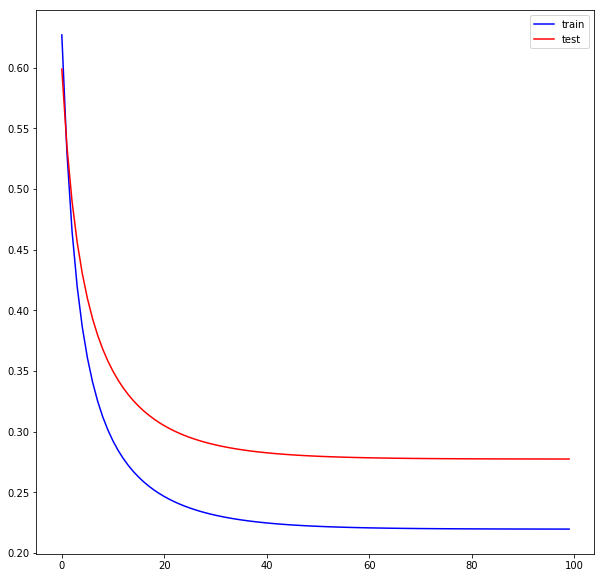

In [687]:
figure(figsize=(10,10))
plt.plot(range(epochs), E_in, 'b', label='train')
plt.plot(range(epochs), E_out, 'r', label='test')
plt.legend()

**Logistic Regression**<br/>
*Results:*<br/> 
1. By repeating experiment the Error of train set decreases faster (but not always the case) than the Error of test set. It can be explained by that the training set is bigger than test set, so the reduction of Error occures faster. 
2. The Error is higher than average Error of Linear Regression and Pocket algorithm. 



*Limitations:*<br/>
1. Might not perform well for very large feature space. We see that the algorithm shows higher Error. 
